In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals import joblib
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

from keras.models import Model
from keras.models import Sequential

from keras.layers import Input, Dense, Embedding, Conv1D, Conv2D, MaxPooling1D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.layers import SpatialDropout1D, concatenate
from keras.layers import GRU, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, LSTM

from keras.callbacks import Callback
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from keras.utils.vis_utils import plot_model


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [15]:
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
# Dataset for Detection of Cyber-Trolls.json
data3 = pd.read_json('Cyber-Trolls.json', lines= True,orient='columns')
#fd = pd.read_json('/data1.json')

for i in range(0,len(data3)):
    if data3.annotation[i]['label'][0] == '1':
        data3.annotation[i] = 1
    else:
        data3.annotation[i] = 0

data3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,content,annotation,extras
0,Get fucking real dude.,1,NaN
1,She is as dirty as they come and that crook ...,1,NaN
2,why did you fuck it up. I could do it all day...,1,NaN
3,Dude they dont finish enclosing the fucking s...,1,NaN
4,WTF are you talking about Men? No men thats n...,1,NaN
...,...,...,...
19996,I dont. But what is complaining about it goi...,0,NaN
19997,Bahah yeah i&;m totally just gonna&; get pis...,0,NaN
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0,NaN
19999,What&;s something unique about Ohio? :),0,NaN


In [ ]:
data3

,content,annotation,extras
0,Get fucking real dude.,1,NaN
1,She is as dirty as they come and that crook ...,1,NaN
2,why did you fuck it up. I could do it all day...,1,NaN
3,Dude they dont finish enclosing the fucking s...,1,NaN
4,WTF are you talking about Men? No men thats n...,1,NaN
...,...,...,...
19996,I dont. But what is complaining about it goi...,0,NaN
19997,Bahah yeah i&;m totally just gonna&; get pis...,0,NaN
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0,NaN
19999,What&;s something unique about Ohio? :),0,NaN


In [16]:
data1 = pd.read_csv('labeled_tweets.csv')
data2 = pd.read_csv('public_data_labeled.csv')

In [17]:
data1.drop_duplicates(inplace = True)
data1.drop('id', axis = 'columns', inplace = True)
data2.drop_duplicates(inplace = True)
data3.drop('extras', axis = 'columns', inplace = True)
#data3.drop_duplicates(inplace = True)

In [ ]:
#import preprocessor as p
!pip install tweet-preprocessor



In [ ]:
import preprocessor as p


def preprocess_tweet(row):
    full_text = row['full_text']
    full_text = p.clean(full_text)
    return full_text

data1['full_text'] = data1.apply(preprocess_tweet, axis=1)
data2['full_text'] = data2.apply(preprocess_tweet, axis=1)


def preprocess_tweet3(row):
    content = row['content']
    content = p.clean(content)
    return content

data3['content'] = data3.apply(preprocess_tweet3, axis=1)



ModuleNotFoundError: ignored

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
def stopword_removal(row):
    full_text = row['full_text']
    full_text = remove_stopwords(full_text)
    return full_text

data1['full_text'] = data1.apply(stopword_removal, axis=1)
data2['full_text'] = data2.apply(stopword_removal, axis=1)

data1['full_text'] = data1['full_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
data2['full_text'] = data2['full_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

def stopword_removal3(row):
    content = row['content']
    content = remove_stopwords(content)
    return content

data3['content'] = data3.apply(stopword_removal3, axis=1)
data3['content'] = data3['content'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [ ]:
data1.head(100)

,label,full_text
0,Offensive,So Drasko just said he was impressed the girls...
2,Offensive,Drasko they didn't cook half a bird you idiot ...
4,Offensive,Hopefully someone cooks Drasko in the next ep ...
6,Offensive,of course you were born in serbia...you're as ...
7,Offensive,These girls are the equivalent of the irritati...
...,...,...
124,Offensive,Oh yeah Colin! Smash those girls! :D #MKR
125,Offensive,Kel the butcher has never heard of these silly...
126,Offensive,@mykitchenrules Did Stevie Wonder choose these...
127,Offensive,#MKR2015 #MKR why do they keep saying that the...


In [18]:
data = pd.concat([data1, data2])

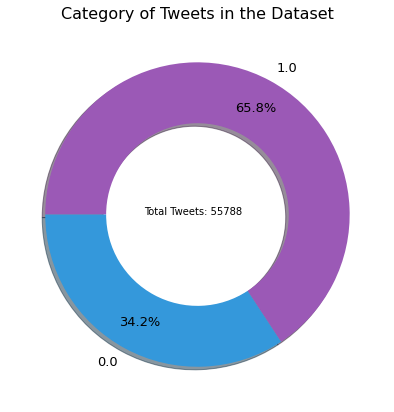

In [10]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

plt.figure(figsize = (7,7))
sorted_counts = data['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 180, counterclock = False, wedgeprops = {'width' : 0.4},
       autopct='%1.1f%%', pctdistance = 0.8, textprops = {'color': 'black', 'fontsize' : 13}, shadow = True,
        colors = sns.color_palette(flatui))
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(data.shape[0]))
plt.title('Category of Tweets in the Dataset', fontsize = 16);
dpi = 150
#plt.savefig('tweetsfig.eps', dpi=dpi) # 3.8M!

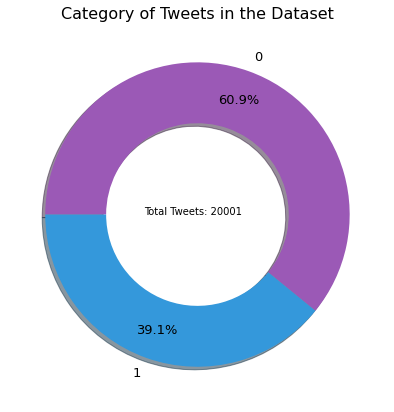

In [ ]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

plt.figure(figsize = (7,7))
sorted_counts = data3['annotation'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 180, counterclock = False, wedgeprops = {'width' : 0.4},
       autopct='%1.1f%%', pctdistance = 0.8, textprops = {'color': 'black', 'fontsize' : 13}, shadow = True,
        colors = sns.color_palette(flatui))
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(data3.shape[0]))
plt.title('Category of Tweets in the Dataset', fontsize = 16);
dpi = 150
#plt.savefig('tweetsfig.eps', dpi=dpi) # 3.8M!

In [19]:
data['label'] = data.label.map({'Offensive': 1, 'Non-offensive': 0})

In [20]:
data3.columns = ['full_text', 'label']

data3

,full_text,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [21]:
data = pd.concat([data, data3])

In [22]:
sorted_counts = data['label'].value_counts()
sorted_counts

1    31353
0    24435
Name: label, dtype: int64

In [23]:
sorted_counts

1    31353
0    24435
Name: label, dtype: int64

In [ ]:
! pip install transformers


     |████████████████████████████████| 1.8MB 6.4MB/s 
     |████████████████████████████████| 2.9MB 23.6MB/s 
     |████████████████████████████████| 890kB 56.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=6b8e78e90d470d877c98821ca1540875f59c7b6c7a778e43a51f03a5f0c703e8
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [24]:
import os
import re
import json
import string
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer

class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  # (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs)  # (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs)  # (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  # (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  # (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  # (batch_size, seq_len, embed_dim)
        return output


class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


In [ ]:

# fit model on dataset
def fit_model(padded_train_sequences, Y_train):
	# define model
  embed_dim = 32  # Embedding size for each token
  num_heads = 2  # Number of attention heads
  ff_dim = 32  # Hidden layer size in feed forward network inside transformer
  maxlen = 150
  vocab_size = 80000
  inputs = layers.Input(shape=(maxlen,))
  embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
  x = embedding_layer(inputs)
  transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
  x = transformer_block(x)
  x = layers.GlobalAveragePooling1D()(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Dense(200, activation="relu")(x)
  x = layers.Dropout(0.1)(x)
  outputs = layers.Dense(2, activation="softmax")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # fit model

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
  history = model.fit(x=padded_train_sequences, y=Y_train, 
                    #validation_data=(padded_test_sequences, Y_test), 
                    batch_size=batch_size, 
                    #callbacks=[checkpoint], 
                    epochs=8, 
                    verbose=1)
  #accuracyscore = modelv.evaluate(padded_test_sequences, Y_test)
  #print(accuracyscore * 100)
  #print("Test loss:", accuracyscore[0])
  #print("Test accuracy:", accuracyscore[1] * 100)
  return model



In [ ]:
from keras.layers import GRU, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D

#y_binary = to_categorical(y_int)
def Bidirectionalfunction(padded_train_sequences, Y_train):
    embedding_dim = 150
    embedding_matrix = np.random.random((MAX_NB_WORDS, embedding_dim))
    
    inp = Input(shape=(MAX_LENGTH, ))
    x = Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_dim, input_length=MAX_LENGTH, 
                  weights=[embedding_matrix], trainable=True)(inp)
    x = SpatialDropout1D(0.1)(x)
    x = Bidirectional(GRU(10, return_sequences=True))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    outp = Dense(2, activation="sigmoid")(conc)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    history = model.fit(x=padded_train_sequences, y=Y_train, 
                    #validation_data=(padded_test_sequences, Y_test), 
                    batch_size=batch_size, 
                    #callbacks=[checkpoint], 
                    epochs=30, 
                    verbose=1)

    return model


model = Bidirectionalfunction(padded_train_sequences, Y_train)

accuracyscore = model.evaluate( padded_test_sequences, Y_test)

print(model.summary())


print(accuracyscore * 100)
print("Test loss:", accuracyscore[0])
print("Test accuracy:", accuracyscore[1] * 100)

y_pred = model.predict([padded_test_sequences])

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test, np.argmax(y_pred, axis = 1)))


Epoch 1/30
1308/1308 [==============================] - 237s 179ms/step - loss: 0.5312 - accuracy: 0.7083
Epoch 2/30
1308/1308 [==============================] - 245s 188ms/step - loss: 0.3088 - accuracy: 0.8625
Epoch 3/30
1308/1308 [==============================] - 236s 181ms/step - loss: 0.2307 - accuracy: 0.9070
Epoch 4/30
1308/1308 [==============================] - 231s 176ms/step - loss: 0.1659 - accuracy: 0.9380
Epoch 5/30
1308/1308 [==============================] - 235s 180ms/step - loss: 0.1208 - accuracy: 0.9568
Epoch 6/30
1308/1308 [==============================] - 241s 184ms/step - loss: 0.0908 - accuracy: 0.9686
Epoch 7/30
1308/1308 [==============================] - 241s 184ms/step - loss: 0.0736 - accuracy: 0.9763
Epoch 8/30
1308/1308 [==============================] - 243s 186ms/step - loss: 0.0586 - accuracy: 0.9811
Epoch 9/30
1308/1308 [==============================] - 242s 185ms/step - loss: 0.0493 - accuracy: 0.9848
Epoch 10/30
1308/1308 [=======================

In [ ]:
# define the model
def define_model3(padded_train_sequences, Y_train):
	# channel 1
	embedding_dim = 150
	inputs1 = Input(shape=(MAX_LENGTH,))
	embedding1 = Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_dim, input_length=MAX_LENGTH)(inputs1)
	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
	# channel 2
	inputs2 = Input(shape=(MAX_LENGTH,))
	embedding2 = Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_dim, input_length=MAX_LENGTH)(inputs2)
	conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)
	# channel 3
	inputs3 = Input(shape=(MAX_LENGTH,))
	embedding3 = Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_dim, input_length=MAX_LENGTH)(inputs3)
	conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D(pool_size=2)(drop3)
	flat3 = Flatten()(pool3)
	# merge
	merged = concatenate([flat1, flat2, flat3])
	# interpretation
	dense1 = Dense(10, activation='relu')(merged)
	outputs = Dense(2, activation='sigmoid')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	model.fit([padded_train_sequences,padded_train_sequences,padded_train_sequences], y_train, epochs=3, batch_size=16)

	#print(model.summary())
	return model



In [25]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras


batch_size = 32
Y = data.label
lebEnc = LabelEncoder()
Y = lebEnc.fit_transform(Y)
Y = Y.reshape(-1,1)


X = data.full_text

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

MAX_NB_WORDS = 80000
MAX_SEQUENCE_LENGTH = max([len(s.split()) for s in X_train]) 
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)


train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)



MAX_LENGTH = max([len(s.split()) for s in X_train])
padded_train_sequences = pad_sequences(train_sequences, maxlen=MAX_LENGTH)
padded_test_sequences = pad_sequences(test_sequences, maxlen=MAX_LENGTH)


Y_test = keras.utils.to_categorical(np.asarray(y_test))
Y_train = keras.utils.to_categorical(np.asarray(y_train))



(13947, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras



batch_size = 32 
Y = data3.annotation
lebEnc = LabelEncoder()
Y = lebEnc.fit_transform(Y)
Y = Y.reshape(-1,1)


X = data3.content

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.90)

MAX_NB_WORDS = 80000
MAX_SEQUENCE_LENGTH = max([len(s.split()) for s in X_train]) 
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)


train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)



MAX_LENGTH = max([len(s.split()) for s in X_train])
padded_train_sequences = pad_sequences(train_sequences, maxlen=MAX_LENGTH)
padded_test_sequences = pad_sequences(test_sequences, maxlen=MAX_LENGTH)


Y_test = keras.utils.to_categorical(np.asarray(y_test))
Y_train = keras.utils.to_categorical(np.asarray(y_train))



AttributeError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras



batch_size = 32
Y = data.label
lebEnc = LabelEncoder()
Y = lebEnc.fit_transform(Y)
Y = Y.reshape(-1,1)


X = data.full_text

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

MAX_NB_WORDS = 80000
MAX_SEQUENCE_LENGTH = max([len(s.split()) for s in X_train]) 


# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english', lowercase = True)

# Fit the training data and then return the matrix
padded_train_sequences = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
padded_test_sequences = count_vector.transform(X_test)



#tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
#tokenizer.fit_on_texts(X_train)


#train_sequences = tokenizer.texts_to_sequences(X_train)
#test_sequences = tokenizer.texts_to_sequences(X_test)



#MAX_LENGTH = max([len(s.split()) for s in X_train])
#padded_train_sequences = pad_sequences(train_sequences, maxlen=MAX_LENGTH)
#padded_test_sequences = pad_sequences(test_sequences, maxlen=MAX_LENGTH)


Y_test = keras.utils.to_categorical(np.asarray(y_test))
Y_train = keras.utils.to_categorical(np.asarray(y_train))



AttributeError: ignored

In [ ]:
print(Y_train.shape) 
print(Y_test.shape)
print(Y_train.shape[0] + Y_test.shape[0])
print(MAX_LENGTH)


print('-------------------------')

print(55788 * 0.25)
print(55788 * 0.75)


(41841, 2)
(13947, 2)
55788
343
-------------------------
13947.0
41841.0


In [ ]:
modelv = tf.keras.models.load_model('content/saved_model/model_1')

accuracyscore = modelv.evaluate(padded_test_sequences, Y_test)

print(accuracyscore * 100)
print("Test loss:", accuracyscore[0])
print("Test accuracy:", accuracyscore[1] * 100)

224/224 [==============================] - 2s 10ms/step - loss: 0.6124 - accuracy: 0.9063
[0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587022781372, 0.6124063730239868, 0.9062587

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#model_save_name = 'classifier.pt'
#path = F"/content/gdrive/My Drive/{filename}" 

!mkdir -p saved_model
n_members = 1
for i in range(n_members):
	# fit model
	model = fit_model(padded_train_sequences, Y_train)
	# save model
	path = 'content/saved_model/model_' + str(i + 1) + ''
	model.save(path)
	print('>Saved %s' % path)
 
 


model = define_model3(padded_train_sequences, y_train)

model.save('content/saved_model/model_2')
print('>Saved as model_2')


model = Bidirectionalfunction(padded_train_sequences, Y_train)

model.save('content/saved_model/model_3')
print('>Saved as model_3')


Epoch 1/8
1432/1432 [==============================] - 44s 31ms/step - loss: 0.2954 - accuracy: 0.8650
Epoch 2/8
1432/1432 [==============================] - 46s 32ms/step - loss: 0.1376 - accuracy: 0.9488
Epoch 3/8
1432/1432 [==============================] - 45s 32ms/step - loss: 0.0739 - accuracy: 0.9738
Epoch 4/8
1432/1432 [==============================] - 45s 32ms/step - loss: 0.0443 - accuracy: 0.9846
Epoch 5/8
1432/1432 [==============================] - 45s 32ms/step - loss: 0.0284 - accuracy: 0.9906
Epoch 6/8
1432/1432 [==============================] - 46s 32ms/step - loss: 0.0209 - accuracy: 0.9931
Epoch 7/8
1432/1432 [==============================] - 45s 32ms/step - loss: 0.0164 - accuracy: 0.9941
Epoch 8/8
1432/1432 [==============================] - 46s 32ms/step - loss: 0.0124 - accuracy: 0.9952
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used

In [ ]:
model = tf.keras.models.load_model(path)

In [ ]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

# load models from file
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'content/saved_model/model_' + str(i + 1) + ''
		# load model from file
		model = tf.keras.models.load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = SGDClassifier()
	model.fit(stackedX, inputy)
	return model

# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
#n_train = 100
#trainX, testX = X[:n_train, :], X[n_train:, :]
#trainy, testy = y[:n_train], y[n_train:]
print(padded_train_sequences.shape, padded_test_sequences.shape)
# load all models
n_members = 3
members = load_all_models(n_members)
print('Loaded %d models' % len(members))
# evaluate standalone models on test dataset
for model in members:
	#testy_enc = to_categorical(testy)
	print(model.name)
	if model.name == "functional_2":
		_, acc = model.evaluate(padded_test_sequences, y_test, verbose=1)
	if model.name == "functional_1":
		_, acc = model.evaluate(padded_test_sequences, Y_test, verbose=1)
	if model.name == "functional_5":
		_, acc = model.evaluate(padded_test_sequences, Y_test, verbose=1)
	print('Model Accuracy: %.3f' % acc)
# fit stacked model using the ensemble
model = fit_stacked_model(members, padded_test_sequences, y_test)
# evaluate model on test set
yhat = stacked_prediction(members, model, padded_test_sequences)
acc = accuracy_score(y_test, yhat)
print('Stacked Test Accuracy: %.3f' % acc)


(28629, 150) (7158, 150)
>loaded content/saved_model/model_1
>loaded content/saved_model/model_2
>loaded content/saved_model/model_3
Loaded 3 models
functional_1
224/224 [==============================] - 3s 12ms/step - loss: 0.6167 - accuracy: 0.9012
Model Accuracy: 0.901
functional_3
Model Accuracy: 0.901
functional_5
224/224 [==============================] - 4s 16ms/step - loss: 0.2894 - accuracy: 0.9142
Model Accuracy: 0.914


AssertionError: ignored

In [ ]:
model

In [ ]:
# define the model
def define_Ch3model(padded_train_sequences, y_train):
	# channel 1
  embed_dim = 40  # Embedding size for each token
  num_heads = 4  # Number of attention heads
  ff_dim = 32  # Hidden layer size in feed forward network inside transformer
  maxlen = MAX_SEQUENCE_LENGTH
  vocab_size = vocab_size = len(tokenizer.word_index) + 1 #80000
  print(vocab_size)
  inputs1 = layers.Input(shape=(maxlen,))
  embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
  x1 = embedding_layer(inputs1)
  transformer_block = TransformerBlock(embed_dim, 2, ff_dim)
  x1 = transformer_block(x1)
  x1= layers.MaxPooling1D()(x1)
 # x1 = layers.Dropout(0.1)(x1)
  x1 = layers.Dense(30, activation="relu")(x1)
  x1 = layers.Dropout(0.1)(x1)
  x1 = Flatten()(x1)
	# channel 2
  inputs2 = Input(shape=(MAX_LENGTH,))
  embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
  x2 = embedding_layer(inputs2)
  transformer_block = TransformerBlock(embed_dim, 10, ff_dim)
  x2 = transformer_block(x2)
  x2= layers.MaxPooling1D()(x2)
  #x2 = layers.Conv1D(filters=32, kernel_size=4, activation='relu')(x2)
  #x2 = layers.Dropout(0.1)(x2)
  x2 = layers.Dense(30, activation="relu")(x2)
  x2 = layers.Dropout(0.1)(x2)
  x2 = Flatten()(x2)
	# channel 3
  inputs3 = Input(shape=(MAX_LENGTH,))
  embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
  x3 = embedding_layer(inputs3)
  transformer_block = TransformerBlock(embed_dim, 8, ff_dim)
  x3 = transformer_block(x3)
  #x3 = transformer_block(x3)
  #x3 = transformer_block(x3)
  x3= layers.MaxPooling1D()(x3)
  #x3 = layers.Dropout(0.1)(x3)
  x3 = layers.Dense(30, activation="relu")(x3)
  x3 = layers.Dropout(0.1)(x3)
  x3 = Flatten()(x3)
	# merge
  merged = concatenate([x1, x2, x3])
  #merged1 = Flatten()(merged1)
	# interpretation

  #merged = Conv1D(filters=(3), kernel_size=(20), activation='relu')(merged1)
  dense1 = Dense(60, activation='relu')(merged)
  dense2 = Dense(30, activation='relu')(dense1)
  outputs = Dense(2, activation='softmax')(dense2)
  model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
  
	# compile
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #model.fit([padded_train_sequences,padded_train_sequences,padded_train_sequences], y_train, epochs=3, batch_size=16)
  history = model.fit(x=[padded_train_sequences,padded_train_sequences, padded_train_sequences], y=Y_train, 
                    #validation_data=(padded_test_sequences, Y_test), 
                    batch_size=200, 
                    #callbacks=[checkpoint], 
                    epochs=40, 
                    verbose=1)
  print(model.summary())
  return model



RUN

In [ ]:
#model = define_Ch3model(padded_train_sequences, Y_train)
model = define_model3(padded_train_sequences, Y_train)
#define_model3

accuracyscore = model.evaluate([padded_test_sequences,padded_test_sequences, padded_test_sequences], Y_test)
#accuracyscore = model.evaluate( padded_test_sequences, Y_test)

print(accuracyscore * 100)
print("Test loss:", accuracyscore[0])
print("Test accuracy:", accuracyscore[1] * 100)



Epoch 1/3


ValueError: ignored

In [ ]:

accuracyscore = model.evaluate([padded_test_sequences,padded_test_sequences, padded_test_sequences], Y_test)
#accuracyscore = model.evaluate( padded_test_sequences, Y_test)

print(accuracyscore * 100)
print("Test loss:", accuracyscore[0])
print("Test accuracy:", accuracyscore[1] * 100)


436/436 [==============================] - 23s 53ms/step - loss: 0.9081 - accuracy: 0.8758
[0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.8758155703544617, 0.9080589413642883, 0.875815

In [ ]:
y_pred = model.predict([padded_test_sequences,padded_test_sequences,padded_test_sequences])


ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

matrix = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

print(matrix)


[[2187  299]
 [ 337 4335]]


In [ ]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']


NameError: ignored

In [ ]:
model.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_23 (InputLayer)           [(None, 150)]        0                                            
__________________________________________________________________________________________________
token_and_position_embedding_16 (None, 150, 32)      2564800     input_21[0][0]                   
______________________________________________________________________________________

In [ ]:
	# channel 1
embed_dim = 16  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
maxlen = MAX_SEQUENCE_LENGTH
vocab_size = vocab_size = len(tokenizer.word_index) + 1 #80000
inputs1 = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x1 = embedding_layer(inputs1)
transformer_block = TransformerBlock(embed_dim, 2, ff_dim)
x1 = transformer_block(x1)
x1= layers.GlobalAveragePooling1D()(x1)
x1 = layers.Dropout(0.1)(x1)
x1 = layers.Dense(20, activation="relu")(x1)
outputs = layers.Dropout(0.1)(x1)
model = Model(inputs=inputs1, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #model.fit([padded_train_sequences,padded_train_sequences,padded_train_sequences], y_train, epochs=3, batch_size=16)
history = model.fit(x=padded_train_sequences, y=Y_train, 
                    #validation_data=(padded_test_sequences, Y_test), 
                    batch_size=batch_size, 
                    #callbacks=[checkpoint], 
                    epochs=30, 
                    verbose=1)


Epoch 1/30


ValueError: ignored

In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

maxlen = MAX_SEQUENCE_LENGTH


inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #model.fit([padded_train_sequences,padded_train_sequences,padded_train_sequences], y_train, epochs=3, batch_size=16)
history = model.fit(x=padded_train_sequences, y=Y_train, 
                    #validation_data=(padded_test_sequences, Y_test), 
                    batch_size=batch_size, 
                    #callbacks=[checkpoint], 
                    epochs=30, 
                    verbose=1)


Epoch 1/30


InvalidArgumentError: ignored

In [ ]:
accuracyscore = model.evaluate(padded_test_sequences, Y_test)

print(accuracyscore * 100)
print("Test loss:", accuracyscore[0])
print("Test accuracy:", accuracyscore[1] * 100)

469/469 [==============================] - 6s 12ms/step - loss: 1.8011 - accuracy: 0.7212
[1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185859680176, 1.8010724782943726, 0.7212185

In [ ]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens
 
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
	# load the doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)
 
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines
 
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, True)
# = process_docs('txt_sentoken/neg', vocab, True)
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
docs = negative_lines + positive_lines
tokenizer.fit_on_texts(docs)
# encode training data set
Xtrain = tokenizer.texts_to_matrix(docs, mode='freq')
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
 
# load all test reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, False)
negative_lines = process_docs('txt_sentoken/neg', vocab, False)
docs = negative_lines + positive_lines
# encode training data set
Xtest = tokenizer.texts_to_matrix(docs, mode='freq')
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])
 
n_words = Xtest.shape[1]
# define network
model = Sequential()
model.add(Dense(50, input_shape=(n_words,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, ytrain, epochs=50, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

In [ ]:
# define the model
def define_Ch3model(padded_train_sequences, y_train):
	# channel 1
  embed_dim = 40  # Embedding size for each token
  num_heads = 4  # Number of attention heads
  ff_dim = 32  # Hidden layer size in feed forward network inside transformer
  maxlen = MAX_SEQUENCE_LENGTH
  vocab_size = vocab_size = len(tokenizer.word_index) + 1 #80000
  print(vocab_size)
  inputs1 = layers.Input(shape=(maxlen,))
  embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
  x1 = embedding_layer(inputs1)
  transformer_block = TransformerBlock(embed_dim, 2, ff_dim)
  x1 = transformer_block(x1)
  x1= layers.MaxPooling1D()(x1)
 # x1 = layers.Dropout(0.1)(x1)
  x1 = layers.Dense(30, activation="relu")(x1)
  x1 = layers.Dropout(0.1)(x1)
  x1 = Flatten()(x1)
	# channel 2
	# merge
 
  #merged1 = Flatten()(merged1)
	# interpretation

  #merged = Conv1D(filters=(3), kernel_size=(20), activation='relu')(merged1)
  dense1 = Dense(40, activation='relu')(x1)
  dense2 = Dense(20, activation='relu')(dense1)
  outputs = Dense(2, activation='softmax')(dense2)
  model = Model(inputs=inputs1, outputs=outputs)
  
	# compile
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #model.fit([padded_train_sequences,padded_train_sequences,padded_train_sequences], y_train, epochs=3, batch_size=16)
  history = model.fit(x=[padded_train_sequences ], y=Y_train, 
                    #validation_data=(padded_test_sequences, Y_test), 
                    batch_size=200, 
                    #callbacks=[checkpoint], 
                    epochs=15, 
                    verbose=1)
  print(model.summary())
  return model

model = define_model3(padded_train_sequences, Y_train)

Epoch 1/40
210/210 [==============================] - 20s 91ms/step - loss: 0.5774 - accuracy: 0.6569
Epoch 2/40
210/210 [==============================] - 19s 88ms/step - loss: 0.2360 - accuracy: 0.9082
Epoch 3/40
210/210 [==============================] - 18s 86ms/step - loss: 0.1335 - accuracy: 0.9523
Epoch 4/40
210/210 [==============================] - 18s 87ms/step - loss: 0.0804 - accuracy: 0.9734
Epoch 5/40
210/210 [==============================] - 18s 88ms/step - loss: 0.0542 - accuracy: 0.9827
Epoch 6/40
210/210 [==============================] - 19s 92ms/step - loss: 0.0386 - accuracy: 0.9875
Epoch 7/40
210/210 [==============================] - 19s 90ms/step - loss: 0.0315 - accuracy: 0.9901
Epoch 8/40
210/210 [==============================] - 19s 91ms/step - loss: 0.0265 - accuracy: 0.9910
Epoch 9/40
210/210 [==============================] - 19s 90ms/step - loss: 0.0216 - accuracy: 0.9932
Epoch 10/40
210/210 [==============================] - 19s 91ms/step - loss: 0.020

In [ ]:
# define the model
def define_model3(padded_train_sequences, Y_train):
	# channel 1
	embedding_dim = 150
	inputs1 = Input(shape=(MAX_LENGTH,))
	embedding1 = Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_dim, input_length=MAX_LENGTH)(inputs1)
	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
	# channel 2
	#inputs2 = Input(shape=(MAX_LENGTH,))
	#embedding2 = Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_dim, input_length=MAX_LENGTH)(inputs2)
	#conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
	#drop2 = Dropout(0.5)(conv2)
	#pool2 = MaxPooling1D(pool_size=2)(drop2)
	#flat2 = Flatten()(pool2)
	# channel 3
	#inputs3 = Input(shape=(MAX_LENGTH,))
	#embedding3 = Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_dim, input_length=MAX_LENGTH)(inputs3)
	#conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
	#drop3 = Dropout(0.5)(conv3)
	#pool3 = MaxPooling1D(pool_size=2)(drop3)
	#flat3 = Flatten()(pool3)
	# merge
	#merged = concatenate([flat1, flat2, flat3])
	# interpretation
	dense1 = Dense(20, activation='relu')(flat1)
	outputs = Dense(2, activation='sigmoid')(dense1)
	model = Model(inputs=inputs1, outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	model.fit([padded_train_sequences], Y_train, epochs=40, batch_size=200)

	#print(model.summary())
	return model

model = define_model3(padded_train_sequences, Y_train)

Epoch 1/40
210/210 [==============================] - 21s 96ms/step - loss: 0.5661 - accuracy: 0.6628
Epoch 2/40
210/210 [==============================] - 19s 91ms/step - loss: 0.2393 - accuracy: 0.9071
Epoch 3/40
210/210 [==============================] - 19s 91ms/step - loss: 0.1452 - accuracy: 0.9475
Epoch 4/40
210/210 [==============================] - 20s 93ms/step - loss: 0.0934 - accuracy: 0.9680
Epoch 5/40
210/210 [==============================] - 19s 90ms/step - loss: 0.0605 - accuracy: 0.9800
Epoch 6/40
210/210 [==============================] - 19s 92ms/step - loss: 0.0407 - accuracy: 0.9862
Epoch 7/40
210/210 [==============================] - 19s 90ms/step - loss: 0.0343 - accuracy: 0.9886
Epoch 8/40
210/210 [==============================] - 19s 91ms/step - loss: 0.0296 - accuracy: 0.9901
Epoch 9/40
210/210 [==============================] - 18s 87ms/step - loss: 0.0233 - accuracy: 0.9919
Epoch 10/40
210/210 [==============================] - 19s 88ms/step - loss: 0.023

In [ ]:

#accuracyscore = model.evaluate([padded_test_sequences,padded_test_sequences, padded_test_sequences], Y_test)
accuracyscore = model.evaluate( padded_test_sequences, Y_test)

print(model.summary())


print(accuracyscore * 100)
print("Test loss:", accuracyscore[0])
print("Test accuracy:", accuracyscore[1] * 100)

y_pred = model.predict([padded_test_sequences])

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test, np.argmax(y_pred, axis = 1)))


436/436 [==============================] - 2s 4ms/step - loss: 1.0764 - accuracy: 0.8728
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 343)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 343, 150)          12000000  
_________________________________________________________________
conv1d (Conv1D)              (None, 340, 32)           19232     
_________________________________________________________________
dropout (Dropout)            (None, 340, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 170, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 5440)              0         
______________________________________

In [ ]:
# define the model
def define_Ch3model(padded_train_sequences, y_train):
	# channel 1
  embed_dim = 40  # Embedding size for each token
  num_heads = 4  # Number of attention heads
  ff_dim = 32  # Hidden layer size in feed forward network inside transformer
  maxlen = MAX_SEQUENCE_LENGTH
  vocab_size = vocab_size = len(tokenizer.word_index) + 1 #80000
  print(vocab_size)
  inputs1 = Input(shape=(maxlen,))
  embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
  x1 = embedding_layer(inputs1)
  transformer_block = TransformerBlock(embed_dim, 10, ff_dim)
  x1 = transformer_block(x1)
  x1=  MaxPooling1D()(x1)
  x1 = Dense(30, activation="relu")(x1)
  x1 = Dropout(0.2)(x1)
  x1 = Flatten()(x1)
	# channel 2
  inputs2 = Input(shape=(MAX_LENGTH,))
  embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
  x2 = embedding_layer(inputs2)
  transformer_block = TransformerBlock(embed_dim, 10, ff_dim)
  x2 = transformer_block(x2)
  x2= MaxPooling1D()(x2)
  x2 = Dense(30, activation="relu")(x2)
  x2 = Dropout(0.2)(x2)
  x2 = Flatten()(x2)
	# channel 3
  #inputs3 = Input(shape=(MAX_LENGTH,))
  #embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
  #x3 = embedding_layer(inputs3)
  #transformer_block = TransformerBlock(embed_dim, 10, ff_dim)
  #x3 = transformer_block(x3)
  #x3= MaxPooling1D()(x3)
  #x3 = Dense(30, activation="relu")(x3)
  #x3 = Dropout(0.1)(x3)
  #x3 = Flatten()(x3)
  embedding_dim = 150
  inputs3 = Input(shape=(MAX_LENGTH,))
  embedding1 = Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_dim, input_length=MAX_LENGTH)(inputs3)
  conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
  drop1 = Dropout(0.5)(conv1)
  pool1 = MaxPooling1D(pool_size=2)(drop1)
  x3 = Flatten()(pool1)
	# merge
  merged = concatenate([x1, x2, x3])
  #merged1 = Flatten()(merged1)
	# interpretation

  #merged = Conv1D(filters=(3), kernel_size=(20), activation='relu')(merged1)
  dense1 = Dense(60, activation='relu')(merged)
  dense2 = Dense(30, activation='relu')(dense1)
  outputs = Dense(2, activation='softmax')(dense2)
  model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
  
	# compile
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #model.fit([padded_train_sequences,padded_train_sequences,padded_train_sequences], y_train, epochs=3, batch_size=16)
  history = model.fit(x=[padded_train_sequences,padded_train_sequences, padded_train_sequences], y=Y_train, 
                    #validation_data=(padded_test_sequences, Y_test), 
                    batch_size=200, 
                    #callbacks=[checkpoint], 
                    epochs=40, 
                    verbose=1)
  print(model.summary())
  return model


model = define_Ch3model(padded_train_sequences, Y_train)
#model = define_model3(padded_train_sequences, Y_train)
#define_model3

accuracyscore = model.evaluate([padded_test_sequences,padded_test_sequences, padded_test_sequences], Y_test)
#accuracyscore = model.evaluate( padded_test_sequences, Y_test)

print(accuracyscore * 100)
print("Test loss:", accuracyscore[0])
print("Test accuracy:", accuracyscore[1] * 100)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test, np.argmax(y_pred, axis = 1)))

46825
Epoch 1/40
210/210 [==============================] - 519s 2s/step - loss: 0.6080 - accuracy: 0.6466
Epoch 2/40
210/210 [==============================] - 472s 2s/step - loss: 0.2383 - accuracy: 0.9065
Epoch 3/40
210/210 [==============================] - 445s 2s/step - loss: 0.1071 - accuracy: 0.9640
Epoch 4/40
210/210 [==============================] - 430s 2s/step - loss: 0.0554 - accuracy: 0.9823
Epoch 5/40
210/210 [==============================] - 420s 2s/step - loss: 0.0345 - accuracy: 0.9898
Epoch 6/40
210/210 [==============================] - 439s 2s/step - loss: 0.0299 - accuracy: 0.9916
Epoch 7/40
210/210 [==============================] - 425s 2s/step - loss: 0.0227 - accuracy: 0.9932
Epoch 8/40
210/210 [==============================] - 419s 2s/step - loss: 0.0191 - accuracy: 0.9947
Epoch 9/40
210/210 [==============================] - 424s 2s/step - loss: 0.0165 - accuracy: 0.9950
Epoch 10/40
210/210 [==============================] - 438s 2s/step - loss: 0.0160 - 

In [ ]:
model.save('content/saved_model/model_last')


INFO:tensorflow:Assets written to: content/saved_model/model_last/assets


INFO:tensorflow:Assets written to: content/saved_model/model_last/assets


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
model.save_weights('content/saved_model/model_lastW') 


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict([padded_test_sequences,padded_test_sequences, padded_test_sequences])




In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))


[[8673  471]
 [1036 8768]]


In [ ]:
print(classification_report(y_test, np.argmax(y_pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      9144
           1       0.95      0.89      0.92      9804

    accuracy                           0.92     18948
   macro avg       0.92      0.92      0.92     18948
weighted avg       0.92      0.92      0.92     18948



In [ ]:
y_pred

array([[9.9999952e-01, 4.5035904e-07],
       [1.1805972e-21, 1.0000000e+00],
       [1.0000000e+00, 1.4593946e-37],
       ...,
       [1.0000000e+00, 8.3060545e-24],
       [8.8793976e-25, 1.0000000e+00],
       [2.2954686e-14, 1.0000000e+00]], dtype=float32)

In [27]:
# define the model
def define_Ch3model(padded_train_sequences, y_train):
	# channel 1
  
  embed_dim = 40  # Embedding size for each token
  embedding_matrix = np.random.random((MAX_NB_WORDS, embed_dim))
  num_heads = 4  # Number of attention heads
  ff_dim = 32  # Hidden layer size in feed forward network inside transformer
  
  maxlen = MAX_SEQUENCE_LENGTH
  vocab_size = vocab_size = len(tokenizer.word_index) + 1 #80000
  print(vocab_size)
  inputs1 = Input(shape=(maxlen,))
  embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
  x1 = embedding_layer(inputs1)
  transformer_block = TransformerBlock(embed_dim, 10, ff_dim)
  x1 = transformer_block(x1)
  x1=  MaxPooling1D()(x1)
  #x1 = Dense(30, activation="relu")(x1)
  x1 = Dropout(0.5)(x1)
  x1 = Flatten()(x1)
	# channel 2
  
  inputs2 = Input(shape=(MAX_LENGTH, ))
  x2 = Embedding(input_dim=MAX_NB_WORDS, output_dim=embed_dim, input_length=maxlen, 
                weights=[embedding_matrix], trainable=True)(inputs2)
  x2 = SpatialDropout1D(0.1)(x2)
  x2 = Bidirectional(GRU(10, return_sequences=True))(x2)
  avg_pool = GlobalAveragePooling1D()(x2)
  max_pool = GlobalMaxPooling1D()(x2)
  x2 = concatenate([avg_pool, max_pool])


  #inputs2 = Input(shape=(MAX_LENGTH,))
  #embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
  #x2 = embedding_layer(inputs2)
  #transformer_block = TransformerBlock(embed_dim, 10, ff_dim)
  #x2 = transformer_block(x2)
  #x2= MaxPooling1D()(x2)
  #x2 = Dense(30, activation="relu")(x2)
  #x2 = Dropout(0.2)(x2)
  #x2 = Flatten()(x2)
	# channel 3
  #inputs3 = Input(shape=(MAX_LENGTH,))
  #embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
  #x3 = embedding_layer(inputs3)
  #transformer_block = TransformerBlock(embed_dim, 10, ff_dim)
  #x3 = transformer_block(x3)
  #x3= MaxPooling1D()(x3)
  #x3 = Dense(30, activation="relu")(x3)
  #x3 = Dropout(0.1)(x3)
  #x3 = Flatten()(x3)
  embedding_dim = 150
  inputs3 = Input(shape=(MAX_LENGTH,))
  embedding1 = Embedding(input_dim=MAX_NB_WORDS, output_dim=embedding_dim, input_length=MAX_LENGTH)(inputs3)
  conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
  drop1 = Dropout(0.5)(conv1)
  pool1 = MaxPooling1D(pool_size=2)(drop1)
  x3 = Flatten()(pool1)
	# merge
  merged = concatenate([x1, x2, x3])
  #merged1 = Flatten()(merged1)
	# interpretation

  #merged = Conv1D(filters=(3), kernel_size=(20), activation='relu')(merged1)
  dense1 = Dense(60, activation='relu')(merged)
  dense2 = Dense(30, activation='relu')(dense1)
  outputs = Dense(2, activation='softmax')(dense2)
  model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
  
	# compile
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  #model.fit([padded_train_sequences,padded_train_sequences,padded_train_sequences], y_train, epochs=3, batch_size=16)
  history = model.fit(x=[padded_train_sequences,padded_train_sequences, padded_train_sequences], y=Y_train, 
                    #validation_data=(padded_test_sequences, Y_test), 
                    batch_size=100, 
                    #callbacks=[checkpoint], 
                    epochs=50, 
                    verbose=1)
  print(model.summary())
  return model


model = define_Ch3model(padded_train_sequences, Y_train)
#model = define_model3(padded_train_sequences, Y_train)
#define_model3

accuracyscore = model.evaluate([padded_test_sequences,padded_test_sequences, padded_test_sequences], Y_test)
#accuracyscore = model.evaluate( padded_test_sequences, Y_test)

print(accuracyscore * 100)
print("Test loss:", accuracyscore[0])
print("Test accuracy:", accuracyscore[1] * 100)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict([padded_test_sequences,padded_test_sequences, padded_test_sequences])

print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test, np.argmax(y_pred, axis = 1)))

47036
Epoch 1/50
419/419 [==============================] - 376s 886ms/step - loss: 0.6011 - accuracy: 0.6551
Epoch 2/50
419/419 [==============================] - 404s 964ms/step - loss: 0.2495 - accuracy: 0.9011
Epoch 3/50
419/419 [==============================] - 393s 938ms/step - loss: 0.1500 - accuracy: 0.9446
Epoch 4/50
419/419 [==============================] - 403s 961ms/step - loss: 0.0862 - accuracy: 0.9682
Epoch 5/50
419/419 [==============================] - 394s 940ms/step - loss: 0.0593 - accuracy: 0.9809
Epoch 6/50
419/419 [==============================] - 379s 903ms/step - loss: 0.0427 - accuracy: 0.9859
Epoch 7/50
419/419 [==============================] - 393s 938ms/step - loss: 0.0371 - accuracy: 0.9878
Epoch 8/50
419/419 [==============================] - 391s 934ms/step - loss: 0.0291 - accuracy: 0.9902
Epoch 9/50
419/419 [==============================] - 414s 989ms/step - loss: 0.0237 - accuracy: 0.9920
Epoch 10/50
419/419 [==============================] - 369

In [ ]:
Total params: 17,868,016
Trainable params: 17,868,016
Non-trainable params: 0
__________________________________________________________________________________________________
None
436/436 [==============================] - 44s 97ms/step - loss: 1.0210 - accuracy: 0.8800
[1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407, 1.0209559202194214, 0.8799741864204407]
Test loss: 1.0209559202194214
Test accuracy: 87.99741864204407
[[5188  913]
 [ 761 7085]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6101
           1       0.89      0.90      0.89      7846

    accuracy                           0.88     13947
   macro avg       0.88      0.88      0.88     13947
weighted avg       0.88      0.88      0.88     13947


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict([padded_test_sequences,padded_test_sequences, padded_test_sequences])

print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))

[[14820  3520]
 [ 3983 19518]]


In [ ]:
print(14820  + 3520)

18340


In [ ]:
from collections import defaultdict

from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
#from yellowbrick.datasets import load_hobbies

# Load the text data
corpus = data

# Create a dict to map target labels to documents of that category
hobbies = defaultdict(list)
for text, label in zip(data.full_text, data.label):
    hobbies[label].append(text)

vectorizer = CountVectorizer(stop_words='english')
docs  = vectorizer.fit_transform(text for text in hobbies['gaming'])
features  = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(
    features=features, size=(1080, 720)
)
visualizer.fit(docs)
visualizer.show()

ValueError: ignored

In [ ]:
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)
        
        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

In [ ]:
# make a list of models
models = [MultinomialNB(), DecisionTreeClassifier(), LinearSVC(), AdaBoostClassifier(), 
          RandomForestClassifier(), BaggingClassifier(),
         LogisticRegression(), SGDClassifier(), KNeighborsClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier()]


re = pipeline(models, padded_train_sequences, y_train, padded_test_sequences, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])




Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
Training DecisionTreeClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training DecisionTreeClassifier finished in 15.72 sec
----------------------------------------------------
Training LinearSVC


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training LinearSVC finished in 2.89 sec
----------------------------------------------------
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 2.03 sec
----------------------------------------------------
Training RandomForestClassifier


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training RandomForestClassifier finished in 128.31 sec
----------------------------------------------------
Training BaggingClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training BaggingClassifier finished in 107.87 sec
----------------------------------------------------
Training LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Training LogisticRegression finished in 2.51 sec
----------------------------------------------------
Training SGDClassifier
Training SGDClassifier finished in 0.19 sec
----------------------------------------------------
Training KNeighborsClassifier


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training KNeighborsClassifier finished in 0.01 sec
----------------------------------------------------
Training ExtraTreesClassifier


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training ExtraTreesClassifier finished in 197.45 sec
----------------------------------------------------
Training GradientBoostingClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training GradientBoostingClassifier finished in 7.76 sec
----------------------------------------------------


In [ ]:

results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

results.sort_values(by = 'Accuracy: Test', inplace = True, ascending = False)

results.reset_index(drop = True)


,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,ExtraTreesClassifier,0.894458,0.890049,0.926234,0.907781,11.289893,0.996511,0.996560,0.997238,0.996899,197.451664
1,RandomForestClassifier,0.887431,0.876083,0.930964,0.902690,8.354014,0.996511,0.996139,0.997663,0.996900,128.313214
2,LogisticRegression,0.886857,0.905034,0.891844,0.898390,0.004939,0.944910,0.958881,0.942459,0.950599,2.514970
3,BaggingClassifier,0.881265,0.875701,0.918691,0.896681,0.668664,0.987070,0.989899,0.987081,0.988488,107.867803
4,LinearSVC,0.880691,0.882010,0.908847,0.895227,0.003598,0.979589,0.983745,0.979899,0.981818,2.894645
5,SGDClassifier,0.880619,0.904480,0.880082,0.892114,0.002780,0.933271,0.952678,0.927415,0.939877,0.185338
6,DecisionTreeClassifier,0.877608,0.867886,0.922143,0.894192,0.076271,0.996511,0.996560,0.997238,0.996899,15.717125
7,MultinomialNB,0.825554,0.824131,0.875863,0.849210,0.006705,0.888005,0.892392,0.910671,0.901439,0.014950
8,AdaBoostClassifier,0.823905,0.927093,0.744567,0.825865,0.526008,0.823068,0.926802,0.744167,0.825504,2.031092
9,GradientBoostingClassifier,0.821969,0.924741,0.743032,0.823988,0.080037,0.825554,0.928511,0.747355,0.828142,7.757308
